In [1]:
# Pythonの禅（心がけよう）
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
# ファイルを読み込むことができる
file_USD = "./USD_JPY_Week1.csv"
print_cnt = 5
with open(file_USD) as f:
    cnt = 0
    while cnt < print_cnt:
        text = f.readline()
        print(text)
        cnt += 1

lTid,cDealable,CurrencyPair,RateDateTime,RateBid,RateAsk

6474889452,D,USD/JPY,2018-03-04 17:00:09.560000000,105.419000,105.489000

6474889479,D,USD/JPY,2018-03-04 17:00:17.810000000,105.462000,105.532000

6474889521,D,USD/JPY,2018-03-04 17:00:26.060000000,105.458000,105.528000

6474889554,D,USD/JPY,2018-03-04 17:00:35.310000000,105.476000,105.546000



In [3]:
# データフレームを使う方が便利
import pandas as pd
df_usd = pd.read_csv(file_USD)
df_usd.head()

,lTid,cDealable,CurrencyPair,RateDateTime,RateBid,RateAsk
0,6474889452,D,USD/JPY,2018-03-04 17:00:09.560000000,105.419,105.489
1,6474889479,D,USD/JPY,2018-03-04 17:00:17.810000000,105.462,105.532
2,6474889521,D,USD/JPY,2018-03-04 17:00:26.060000000,105.458,105.528
3,6474889554,D,USD/JPY,2018-03-04 17:00:35.310000000,105.476,105.546
4,6474889598,D,USD/JPY,2018-03-04 17:00:38.310000000,105.461,105.531


In [4]:
#　中身の統計量の確認
df_usd.describe()

,lTid,RateBid,RateAsk
count,4.248600e+05,424860.000000,424860.000000
mean,6.483948e+09,106.075241,106.080853
std,5.389774e+06,0.404739,0.404252
min,6.474889e+09,105.350000,105.354000
25%,6.479199e+09,105.738000,105.743000
50%,6.483765e+09,106.075000,106.081000
75%,6.488690e+09,106.228000,106.235000
max,6.493389e+09,107.051000,107.054000


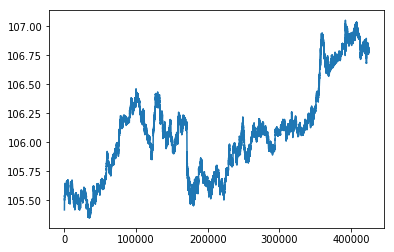

In [5]:
# 図示して確認
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df_usd["RateBid"])

In [6]:
# もう１ファイルも同様に確認
df_eur = pd.read_csv("./EUR_JPY_Week1.csv")
df_eur.head()

,lTid,cDealable,CurrencyPair,RateDateTime,RateBid,RateAsk
0,6474889765,D,EUR/JPY,2018-03-04 17:00:55.560000000,130.103,130.246
1,6474890588,D,EUR/JPY,2018-03-04 17:03:08.807000000,130.135,130.276
2,6474890743,D,EUR/JPY,2018-03-04 17:03:26.057000000,130.104,130.253
3,6474890809,D,EUR/JPY,2018-03-04 17:03:31.807000000,130.104,130.245
4,6474890822,D,EUR/JPY,2018-03-04 17:03:33.807000000,130.108,130.256


In [7]:
df_eur.describe()

,lTid,RateBid,RateAsk
count,5.412410e+05,541241.000000,541241.000000
mean,6.483878e+09,131.098910,131.108952
std,5.431323e+06,0.561547,0.561119
min,6.474890e+09,129.350000,129.360000
25%,6.479011e+09,130.846000,130.858000
50%,6.483638e+09,131.279000,131.288000
75%,6.488625e+09,131.485000,131.493000
max,6.493389e+09,132.016000,132.022000


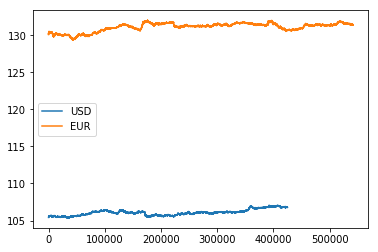

In [8]:
#　２グラフを比較
plt.plot(df_usd["RateBid"], label="USD")
plt.plot(df_eur["RateBid"], label="EUR")
plt.legend(loc="center left")
plt.show()

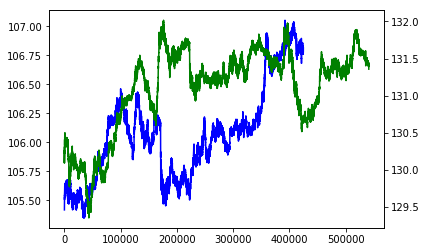

In [9]:
# 軸を揃える
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_usd["RateBid"], label="USD", color="b")
ax2.plot(df_eur["RateBid"], label="EUR", color="g")
plt.show()

In [10]:
# 同じ時刻に記録されているものを調べる
set_usd = set(df_usd["RateDateTime"])
set_eur = set(df_eur["RateDateTime"])
set_dup = set_usd & set_eur
print("USDレコード:{}".format(len(df_usd["RateDateTime"])))
print("EURレコード:{}".format(len(df_eur["RateDateTime"])))
print("同時刻のレコード:{}".format(len(set_dup)))

USDレコード:424860
EURレコード:541241
同時刻のレコード:284852


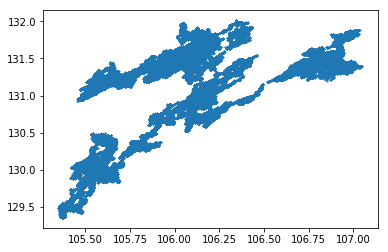

In [11]:
# 同じ時刻のUSDとEURのレコードのRateBidを散布図にしてみる
list_usd = [x for t, x in zip(df_usd["RateDateTime"], df_usd["RateBid"]) if t in set_dup]
list_eur = [x for t, x in zip(df_eur["RateDateTime"], df_eur["RateBid"]) if t in set_dup]
plt.scatter(list_usd, list_eur, s=1, marker='x')

In [12]:
# 相関係数を求める関数を作る
import numpy as np
def my_corrcoef(x_list, y_list):
    x = np.array(x_list)
    y = np.array(y_list)
    c_var = np.dot(x - x.mean(), y - y.mean()) / len(x)
    return c_var / (x.std() * y.std())

print(my_corrcoef(list_usd,list_eur))

0.5769887523908291


In [13]:
# numpy との一致を確認
print(np.corrcoef(list_usd,list_eur))

[[1.         0.57698875]
 [0.57698875 1.        ]]


In [14]:
# 回帰直線を引くためにモデルを作成
import random
class MyRegression():
    
    @classmethod
    def standardize(self, X):
        """
        正規化
        """
        return (X - X.mean()) / X.std()
    
    def __init__(self, ETA=0.000001, cnt=100):
        """
        コンストラクタ
        """
        self.ETA = ETA
        self.cnt = cnt
        self.loss = 0
        self.theta_0 = random.random()
        self.theta_1 = random.random()
    
    def f(self, X):
        """
        モデル部分
        """
        return self.theta_0 + self.theta_1 * X

    
    def J(self, X, y):
        """
        目的関数
        """
        return 0.5 * sum((y - self.f(X)) ** 2)
    

    def fit(self, X, y):
        """
        学習
        """
        self.loss = self.J(X, y)
        self.__print(0)
        for i in range(self.cnt):
            self.theta_0 -= self.ETA * sum(self.f(X) - y)
            self.theta_1 -= self.ETA * sum((self.f(X) - y) * X)
            if (i+1) % 20 == 0:
                self.loss = self.J(X, y)
                self.__print(i)
                if self.loss < 0.0001:
                    break
                
    def predict(self, X):
        """
        予測
        """
        return np.array([x * self.theta_1 + self.theta_0 for x in X])
        

    def __print(self, cnt):
        """
        ログ出力
        """
        print("cnt:{}, theta_0:{:.2f}, theta_1:{:.2f}, loss:{}".format(cnt, self.theta_0, self.theta_1, self.loss))


In [15]:
# モデルに学習させる
reg = MyRegression()
array_usd_std = MyRegression.standardize(np.array(list_usd))
reg.fit(array_usd_std, np.array(list_eur))

cnt:0, theta_0:0.68, theta_1:0.54, loss:2423011664.729495
cnt:19, theta_0:130.95, theta_1:0.32, loss:33062.06458000842
cnt:39, theta_0:131.11, theta_1:0.32, loss:29429.72271991696
cnt:59, theta_0:131.11, theta_1:0.32, loss:29429.717274592178
cnt:79, theta_0:131.11, theta_1:0.32, loss:29429.717274582315
cnt:99, theta_0:131.11, theta_1:0.32, loss:29429.717274583218


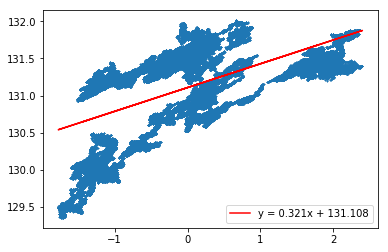

In [16]:
#  モデルの学習結果に基づく回帰直線を引く
plt.scatter(array_usd_std, list_eur, s=1, marker='x')
plt.plot(array_usd_std, reg.predict(array_usd_std), color="red",
                label="y = {:.3f}x + {:.3f}".format(reg.theta_1, reg.theta_0))
plt.legend()
plt.show()

In [17]:
# RateBidを1分単位に変更する
for df in (df_usd, df_eur):
    df["NewRateDateTime"] = df["RateDateTime"].apply(lambda x: x[:16])
df_usd.head()

,lTid,cDealable,CurrencyPair,RateDateTime,RateBid,RateAsk,NewRateDateTime
0,6474889452,D,USD/JPY,2018-03-04 17:00:09.560000000,105.419,105.489,2018-03-04 17:00
1,6474889479,D,USD/JPY,2018-03-04 17:00:17.810000000,105.462,105.532,2018-03-04 17:00
2,6474889521,D,USD/JPY,2018-03-04 17:00:26.060000000,105.458,105.528,2018-03-04 17:00
3,6474889554,D,USD/JPY,2018-03-04 17:00:35.310000000,105.476,105.546,2018-03-04 17:00
4,6474889598,D,USD/JPY,2018-03-04 17:00:38.310000000,105.461,105.531,2018-03-04 17:00


In [18]:
# 1分単位でレートをまとめる
di_usd = {}
di_eur = {}
for di, df in zip((di_usd, di_eur), (df_usd, df_eur)):
    for t, x in zip(df["NewRateDateTime"], df["RateBid"]):
        di[t] = [x] if di.get(t) is None else di[t] + [x]

In [19]:
#　確認（重いので最初だけ）
print(str(di_usd)[:300])

{'2018-03-08 00:16': [106.033, 106.033, 106.033, 106.033, 106.034, 106.037, 106.038, 106.039, 106.038, 106.037, 106.036, 106.037, 106.039, 106.04, 106.037, 106.038, 106.039, 106.042, 106.046, 106.043, 106.042, 106.043, 106.042, 106.045, 106.044, 106.045, 106.049, 106.048, 106.047, 106.044, 106.046, 


In [20]:
# １分単位の最大値と最小値の差分を取る
di_usd_min_max = {t:max(di_usd[t]) - min(di_usd[t]) for t in di_usd}
di_eur_min_max = {t:max(di_eur[t]) - min(di_eur[t]) for t in di_eur}

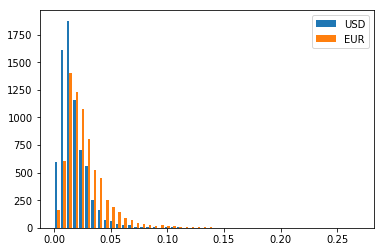

In [21]:
# 1分単位の最大値と最小値の差分のヒストグラムを描く
plt.hist([list(di_usd_min_max.values()),
               list(di_eur_min_max.values())], label=["USD", "EUR"], bins=50)
plt.legend()
plt.show()